In [1]:
import pandas as pd
!pip install wrds
import wrds
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_permno = pd.read_csv('/content/permno_ticker.csv', header=0)

In [4]:
ticker_permno=df_permno.groupby('permno')['ticker'].unique().to_dict()
permno_map = {
    ticker: permno
    for permno, tickers in ticker_permno.items()
    for ticker in tickers
}

permno_map

{'OMFGA': 10000,
 'GFGC': 10001,
 'EWST': 10001,
 'EGAS': 84803,
 'MBNC': 10002,
 'SABC': 10002,
 'BTFG': 10002,
 'GCBK': 10003,
 'CLSO': 10004,
 'WERC': 10005,
 nan: 93369,
 'ACF': 75858,
 'SDIC': 10007,
 'SDICV': 10007,
 'SHRD': 10007,
 'GACO': 10008,
 'CAYB': 10009,
 'IROQ': 12920,
 'CBOT': 10010,
 'ATCE': 10011,
 'ATCS': 10011,
 'DPAC': 10012,
 'AAPI': 10013,
 'AJ': 61276,
 'AMFD': 10015,
 'FIGIA': 10016,
 'SCTTA': 10016,
 'SCTT': 77300,
 'CCUR': 51829,
 'DCIS': 10018,
 'IFRS': 10019,
 'KEYC': 67299,
 'BIRI': 10021,
 'DOCX': 83931,
 'AEPI': 10025,
 'JJSF': 10026,
 'TNII': 10027,
 'MINT': 93108,
 'DLS': 91332,
 'DGSE': 10028,
 'DGC': 76769,
 'ELA': 10028,
 'AIFS': 10029,
 'AIF': 58077,
 'ABK': 76757,
 'ANTQ': 10031,
 'PLXS': 10032,
 'MABK': 10033,
 'HCSB': 10034,
 'GGUY': 10035,
 'NURO': 90288,
 'FSLA': 77775,
 'FSVB': 11848,
 'FBCP': 10037,
 'POCI': 77263,
 'XIOX': 10039,
 'ATCM': 10570,
 'HARVY': 10040,
 'GGGG': 12617,
 'CYNR': 10042,
 'CAU': 10042,
 'AATI': 90854,
 'RMCF': 10044,

### wrdsdatapull

In [5]:
df=pd.read_csv('/content/wrds_fin_data.csv', header=0)

In [6]:
df['public_date'].sort_values()

,public_date
3756,2020-03-31
58595,2020-03-31
150325,2020-03-31
60149,2020-03-31
147982,2020-03-31
...,...
103524,2024-12-31
179865,2024-12-31
103520,2024-12-31
97144,2024-12-31


In [7]:
df.head()

,Unnamed: 0,gvkey,permno,adate,qdate,public_date,capei,be,bm,evm,...,ffi30_desc,ffi30,ffi38_desc,ffi38,ffi48_desc,ffi48,ffi49_desc,ffi49,ticker,cusip
0,0,1121,61487,2020-12-31,2020-12-31,2021-02-28,43.533009,161.801,1.581936,9.500596,...,WHLSL,26.0,WHLSL,33.0,WHLSL,41.0,WHLSL,42.0,AE,00635130
1,1,1121,61487,2020-12-31,2021-09-30,2022-01-31,38.897014,158.082,1.198251,3.882616,...,WHLSL,26.0,WHLSL,33.0,WHLSL,41.0,WHLSL,42.0,AE,00635130
2,2,1121,61487,2020-12-31,2021-09-30,2021-12-31,36.069555,158.082,1.198251,3.882616,...,WHLSL,26.0,WHLSL,33.0,WHLSL,41.0,WHLSL,42.0,AE,00635130
3,3,1121,61487,2020-12-31,2021-09-30,2021-11-30,35.343236,158.082,1.198251,3.882616,...,WHLSL,26.0,WHLSL,33.0,WHLSL,41.0,WHLSL,42.0,AE,00635130
4,4,1121,61487,2020-12-31,2021-06-30,2021-10-31,53.712337,154.851,1.313673,3.146766,...,WHLSL,26.0,WHLSL,33.0,WHLSL,41.0,WHLSL,42.0,AE,00635130


### YFinance Data Pull

In [8]:
yfin_df=pd.read_csv('/content/yfinance_data_raw_dec_05.csv'
                    ,header=[1,2])

In [9]:
yfin_df.head()

,Price,Close,High,Low,Open,Volume,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
,Ticker,APA,APA,APA,APA,APA,REX,REX,REX,REX,...,CGRO,CGRO,CGRO,CGRO,CGRO,FUSE,FUSE,FUSE,FUSE,FUSE
0,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,21.878725,22.370478,21.680297,22.172052,3395100.0,13.770000,13.856667,13.518333,13.723333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,22.163422,22.551647,22.025386,22.180675,5940600.0,13.815000,13.895000,13.475000,13.670000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,22.120283,22.413610,21.714803,22.379102,4471700.0,13.675000,13.848333,13.543333,13.758333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,28.047205,28.107599,25.450403,25.821375,37002300.0,13.253333,13.646667,13.170000,13.580000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# set the DataFrame's column names equal to this new list
yfin_df.columns = ['_'.join([str(x) for x in col if str(x) != 'nan'])   # join parts of column name with "_" and skip 'nan' values
              for col in yfin_df.columns]           # loop through each original column name (which is a tuple from a MultiIndex)


In [11]:
ticks = list(                                   # convert the result into a list
    set([                                       # use a set to remove duplicates
        c.split('_')[1]                         # take the 2nd part of the column name (after the "_")
        for c in yfin_df.columns                # loop through each column name in the DataFrame
        if '_' in c                             # only process columns that contain an "_"
    ])
)

ticks                                           # show the resulting list of tickers


['BEEM',
 'FLWS',
 'MASS',
 'AUB',
 'HTH',
 'LTBR',
 'ASYS',
 'SCWO',
 'INGN',
 'AQST',
 'CVNA',
 'ATER',
 'IBRX',
 'NWFL',
 'TAIT',
 'TRGP',
 'WKC',
 'AVNS',
 'LIXT',
 'SNBR',
 'NKGN',
 'CLMB',
 'WOOF',
 'CRNC',
 'CAL',
 'NATL',
 'HIPO',
 'ONFO',
 'OXY',
 'IONQ',
 'JOB',
 'TNET',
 'ADM',
 'PSTG',
 'DD',
 'AZZ',
 'SOND',
 'BAND',
 'SRFM',
 'CLDI',
 'ARES',
 'TSHA',
 'ECOR',
 'SF',
 'FUSB',
 'ROG',
 'CLNE',
 'BATL',
 'ACRS',
 'PRK',
 'KAR',
 'FTNT',
 'BLMN',
 'COTY',
 'GLUE',
 'ARAY',
 'CADE',
 'IMNN',
 'VRPX',
 'NUWE',
 'RAIL',
 'VIRC',
 'MMI',
 'GEHC',
 'HUBS',
 'NUS',
 'HZO',
 'AGIO',
 'UNFI',
 'V',
 'PPG',
 'HOOD',
 'NFBK',
 'AMSC',
 'SMHI',
 'IPDN',
 'EFTR',
 'SHIM',
 'ICCC',
 'ESAB',
 'GAP',
 'JMSB',
 'HALO',
 'URI',
 'MASI',
 'FORR',
 'HLI',
 'MBOT',
 'SGD',
 'BCLI',
 'IBOC',
 'NVDA',
 'CRUS',
 'SYRA',
 'ARQT',
 'VALU',
 'RRBI',
 'EQX',
 'SILO',
 'SNCY',
 'NWE',
 'JBSS',
 'COSM',
 'CRIS',
 'LNN',
 'HURN',
 'CINF',
 'HBNC',
 'MU',
 'AVIR',
 'WMG',
 'SEB',
 'RZLT',
 'VNRX',
 'CW',


In [12]:
yfin_df = yfin_df.rename(columns={yfin_df.columns[0]: "public_date"})   # rename the first column to "public_date"
yfin_df = yfin_df.iloc[1:]                                              # drop the first row (start from row index 1)
yfin_df['public_date'] = pd.to_datetime(yfin_df['public_date'])         # convert the public_date column to a proper datetime format


In [13]:
yfin_df_long = yfin_df.melt(         # reshape the DataFrame from wide format to long format
    id_vars="public_date",           # keep the "public_date" column as-is (don’t melt it)
    var_name="variable",             # name the new column that will hold former column names
    value_name="value"               # name the new column that will hold the cell values
)


In [14]:
# split the "variable" column into two new columns: "field" and "ticker"
yfin_df_long[['field', 'ticker']] = yfin_df_long['variable'].str.split('_', expand=True)

yfin_df_long = yfin_df_long.drop(columns=['variable'])     # remove the original "variable" column since we no longer need it

yfin_df_long.head()                                        # show the first 5 rows of the updated DataFrame


,public_date,value,field,ticker
0,2020-01-02,21.878725,Close,APA
1,2020-01-03,22.163422,Close,APA
2,2020-01-06,22.120283,Close,APA
3,2020-01-07,28.047205,Close,APA
4,2020-01-08,28.237003,Close,APA


In [15]:
yfin_df_long['permno']=yfin_df_long['ticker'].map(permno_map)

In [16]:
yfin_df_long

,public_date,value,field,ticker,permno
0,2020-01-02,21.878725,Close,APA,39490
1,2020-01-03,22.163422,Close,APA,39490
2,2020-01-06,22.120283,Close,APA,39490
3,2020-01-07,28.047205,Close,APA,39490
4,2020-01-08,28.237003,Close,APA,39490
...,...,...,...,...,...
21947215,2024-12-23,0.000000,Volume,FUSE,82700
21947216,2024-12-24,0.000000,Volume,FUSE,82700
21947217,2024-12-26,0.000000,Volume,FUSE,82700
21947218,2024-12-27,2300.000000,Volume,FUSE,82700


In [17]:
yfin_df_long_tidy = yfin_df_long.pivot_table(     # create a pivot table (wide format) from the long data
    index=["public_date", "permno"],              # use date + ticker as the row index (unique row identifiers)
    columns="field",                              # each unique "field" value becomes its own column
    values="value"                                # fill the table with the actual numeric values
).reset_index()                                   # turn the index back into normal columns

yfin_df_long_tidy                                 # display the resulting DataFrame


field,public_date,permno,Close,High,Low,Open,Volume
0,2020-01-02,10026,162.958496,166.205477,162.743236,166.205477,89200.0
1,2020-01-02,10028,1.380000,1.380000,1.360000,1.360000,4400.0
2,2020-01-02,10032,77.230003,77.739998,76.400002,77.580002,82800.0
3,2020-01-02,10044,8.920405,9.245680,8.920405,9.245680,15600.0
4,2020-01-02,10066,2.371544,2.371544,2.371544,2.371544,0.0
...,...,...,...,...,...,...,...
3964175,2024-12-30,93397,23.728893,24.646095,23.462610,23.995178,66900.0
3964176,2024-12-30,93426,23.230000,23.650000,22.620001,23.200001,58500.0
3964177,2024-12-30,93429,194.794998,196.564701,193.194339,196.057645,648300.0
3964178,2024-12-30,93434,8.430000,9.220000,7.470000,9.220000,36900.0


In [18]:

# Make sure date column is datetime                                      # ensure proper type
yfin_df_long_tidy['public_date'] = pd.to_datetime(yfin_df_long_tidy['public_date'])

# Sort by ticker and date                                                # correct ordering
yfin_df_long_tidy = yfin_df_long_tidy.sort_values(['permno', 'public_date'])

# Compute daily simple returns                                           # pct change in Close
yfin_df_long_tidy['ret_daily'] = (
    yfin_df_long_tidy.groupby('permno')['Close'].pct_change()
)

# Compute rolling 60-day std of returns                                  # 60 trading day window
yfin_df_long_tidy['vol_60d'] = (
    yfin_df_long_tidy
    .groupby('permno')['ret_daily']
    .rolling(window=60)
    .std()
    .reset_index(level=0, drop=True)
)

# Annualize the 60-day realized volatility                               # convert to annual vol
yfin_df_long_tidy['vol_60d_ann'] = yfin_df_long_tidy['vol_60d'] * np.sqrt(252)

# Clean invalid values                                                   # handle inf, -inf
yfin_df_long_tidy.loc[
    ~np.isfinite(yfin_df_long_tidy['vol_60d_ann']),
    'vol_60d_ann'
] = np.nan

# Save final dataframe as new object                                    # keep results separate
yfin_df_vol_calc = yfin_df_long_tidy.copy()

# Preview                                                                # check a few rows
yfin_df_vol_calc[['permno','public_date','Close','ret_daily','vol_60d_ann']].head()


field,permno,public_date,Close,ret_daily,vol_60d_ann
0,10026,2020-01-02,162.958496,NaN,NaN
2663,10026,2020-01-03,165.855713,0.017779,NaN
5326,10026,2020-01-06,165.999191,0.000865,NaN
7990,10026,2020-01-07,164.169418,-0.011023,NaN
10654,10026,2020-01-08,163.281448,-0.005409,NaN


In [19]:
# Make sure date column is datetime                                     # ensure proper type
yfin_df_vol_calc['public_date'] = pd.to_datetime(yfin_df_vol_calc['public_date'])

# Sort by ticker and date                                               # correct ordering
yfin_df_vol_calc = yfin_df_vol_calc.sort_values(['permno', 'public_date'])

# Compute daily dollar volume                                           # Close × Volume
yfin_df_vol_calc['dollar_volume'] = (
    yfin_df_vol_calc['Close'] * yfin_df_vol_calc['Volume']
)

# Compute 63-day rolling average of dollar volume                       # 63 trading days ≈ 3 months
yfin_df_vol_calc['addv_63d'] = (
    yfin_df_vol_calc
    .groupby('permno')['dollar_volume']
    .rolling(window=63)
    .mean()
    .reset_index(level=0, drop=True)
)

# Clean invalid values                                                  # handle inf, -inf, errors
yfin_df_vol_calc.loc[
    ~np.isfinite(yfin_df_vol_calc['addv_63d']),
    'addv_63d'
] = np.nan

# Save into new dataframe                                               # final ADDV dataset
yfin_df_volatility_addv = yfin_df_vol_calc.copy()

# Preview                                                               # show sample rows
yfin_df_volatility_addv[['permno','public_date','Close','Volume','dollar_volume','addv_63d']].head()


field,permno,public_date,Close,Volume,dollar_volume,addv_63d
0,10026,2020-01-02,162.958496,89200.0,1.453590e+07,NaN
2663,10026,2020-01-03,165.855713,71700.0,1.189185e+07,NaN
5326,10026,2020-01-06,165.999191,70500.0,1.170294e+07,NaN
7990,10026,2020-01-07,164.169418,72700.0,1.193512e+07,NaN
10654,10026,2020-01-08,163.281448,118800.0,1.939784e+07,NaN


In [20]:
yfin_df_volatility_addv_mom=yfin_df_volatility_addv.copy()

# Make sure public_date is datetime                     # ensure proper date type
yfin_df_volatility_addv_mom['public_date'] = pd.to_datetime(yfin_df_volatility_addv_mom['public_date'])

# Sort by permno and date                               # correct time order
yfin_df_volatility_addv_mom = yfin_df_volatility_addv_mom.sort_values(['permno', 'public_date'])

# Compute 12-month lagged price                         # price 12 months earlier
yfin_df_volatility_addv_mom['momentum_12m'] = (
    yfin_df_volatility_addv_mom
    .groupby('permno')['Close']
    .pct_change(252)
)

In [21]:
yfin_df_volatility_addv_mom_filter=yfin_df_volatility_addv_mom[yfin_df_volatility_addv_mom['public_date']>=pd.to_datetime('2020-12-31 00:00:00')]

In [25]:
df['public_date'] = pd.to_datetime(df['public_date'])   # convert the 'public_date' column into proper datetime objects


In [26]:
merged = df.merge(                                      # merge two DataFrames together and store in "merged"
    yfin_df_volatility_addv_mom_filter,                            # the second DataFrame you are merging with
    on=['public_date', 'permno'],                       # match rows where both date AND ticker are the same
    how='inner'                                         # keep only rows that appear in BOTH DataFrames (inner join)
)                                                       # end of merge


In [27]:
# list of all columns we need to be present (no missing values)
required_vars = ['permno','gicdesc','Close', 'pe_exi', 'bm','ps','roe','roa','gprof','debt_assets', 'cash_debt',
                 'vol_60d_ann','addv_63d','momentum_12m']

missing_by_ticker = (                                         # calculate missing values per ticker
    merged                                                    # use the merged dataset
    .groupby('permno')[required_vars]                         # group data by ticker and select columns of interest
    .apply(lambda df: df.isna().sum())                        # count how many missing values each ticker has in each variable
)

missing_by_ticker                                             # display results: rows = tickers, columns = required vars


,permno,gicdesc,Close,pe_exi,bm,ps,roe,roa,gprof,debt_assets,cash_debt,vol_60d_ann,addv_63d,momentum_12m
permno,,,,,,,,,,,,,,
10026,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10028,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10032,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10044,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10066,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93397,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93426,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93429,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
valid_tickers = (                                                        # find tickers with complete data
    missing_by_ticker                                                    # start with the missing summary
    .loc[missing_by_ticker.sum(axis=1) == 0]                             # keep tickers where total missing = 0 across all variables
    .index                                                               # extract ticker names (row labels)
    .tolist()                                                            # convert to Python list
)

len(valid_tickers)                                                       # show how many tickers are fully complete


1675

In [29]:
merged_clean = merged[merged['permno'].isin(valid_tickers)]   # keep only the rows whose ticker is in the valid_tickers list

In [30]:
merged_clean = merged_clean[                                             # reassign to a subset of columns
    ['permno','ticker', 'public_date'] + required_vars                             # keep ticker, date, and all required variables
]


In [31]:
merged_clean.head()

,permno,ticker,public_date,permno,gicdesc,Close,pe_exi,bm,ps,roe,roa,gprof,debt_assets,cash_debt,vol_60d_ann,addv_63d,momentum_12m
32,68830,REX,2020-12-31,68830,Energy,31.781427,53.239130,0.884997,1.197539,0.007395,0.008527,0.048184,0.081067,0.220552,0.302880,1.149574e+07,-0.119672
33,68830,REX,2022-02-28,68830,Energy,37.194832,6.360943,0.793896,0.811903,0.075311,0.110754,0.161496,0.097522,0.204521,0.165502,1.314743e+07,0.167399
34,68830,REX,2022-01-31,68830,Energy,36.672142,6.493603,0.793896,0.828836,0.075311,0.110754,0.161496,0.097522,0.204521,0.173594,1.163333e+07,0.224345
35,68830,REX,2021-12-31,68830,Energy,35.047207,6.464646,0.793896,0.825140,0.075311,0.110754,0.161496,0.097522,0.204521,0.223139,1.450261e+07,0.102757
36,68830,REX,2021-11-30,68830,Energy,31.764372,7.239459,0.821499,0.890892,0.064962,0.094627,0.143647,0.089719,0.204521,0.221036,1.477682e+07,0.080892


In [32]:
merged_clean.to_csv('C:\\Users\\kjcul\\OneDrive\\SHU\\DATA MINING BUAN-670-AB\\Final Exam Project\\merged_clean-dec-10.csv',header=True)

data_sp500=pd.read_csv("C:\\Users\\kjcul\\OneDrive\\SHU\\DATA MINING BUAN-670-AB\\Final Exam Project\kjc edit sp500 wrds_fin_data 1.csv")

data_sp500

sp500_ls=data_sp500['ticker'].unique().tolist()

len(list(set(valid_tickers).intersection(sp500_ls)))

len([i for i in sp500_ls if i not in valid_tickers])

len(sp500_ls)

data_sp500=pd.read_csv("C:\\Users\\kjcul\\OneDrive\\SHU\\DATA MINING BUAN-670-AB\\Final Exam Project\sp500_constituents_converted from git hub converted to csv by chat gpt.csv")

data_sp500

data_sp500=data_sp500[data_sp500['stock_index']=='SP500']

sp500_ls=data_sp500['ticker'].unique().tolist()

sp500_ls

len(list(set(valid_tickers).intersection(sp500_ls)))

len(sp500_ls)

SYED ACTION ITEM(S):  
1- after merging for some permno numbers have 32 and others have 33 unique values (syed)

2-optimum number of cluster were not taken (syed)

NOTES FOR Syed..."Use permno as your primary company identifier and map gvkey into it when you merge fundamentals"

Use permno for anything involving stock prices or returns.  (Market data → CRSP → permno is the key.)
Use gvkey for anything involving accounting fundamentals.  (Financial statements → Compustat → gvkey is the key.)

Why this matters:
permno - Permanent identifier used by CRSP, it never changes, even if a company changes ticker;
    Best choice when you are:
    Merging with CRSP stock price data; Creating momentum, beta, volatility factors; Doing anything time-series related with returns
gvkey - Permanent identifier used by Compustat
    Best choice when you are:
    Using income statement, balance sheet, or cash flow data; Working with OSAM-style fundamental factors:
    (ROA, gross profits, book-to-market, leverage, accruals)

So which one should you use?...Since your project uses BOTH:
    CRSP price data (for factors like momentum, returns, volatility)
    Compustat financial data (for valuation, profitability, leverage factors)

Need both.

But !!! … When building your master dataset, you should index it by: permno
    Because stock-level analysis and clustering are price-series based.

Then: Convert gvkey → permno using the WRDS CRSP/Compustat Linking Table
    Merge fundamentals into your permno-indexed dataset
    This is what OSAM, AQR, and academic researchers do.


BEGIN CONSTRUCTION OF FACTOR GROUPS (based upon pulls from WRDS wrdsapps_finratio & YFinance yf.download)

In [33]:
factors_build_df=merged_clean.copy()

# See Sector lable

factors_build_df[['ticker', 'public_date', 'gicdesc']].head()                     # quick inspection

,ticker,public_date,gicdesc
32,REX,2020-12-31,Energy
33,REX,2022-02-28,Energy
34,REX,2022-01-31,Energy
35,REX,2021-12-31,Energy
36,REX,2021-11-30,Energy


In [34]:
### Value Component 1 of 3: earnings_yield (Direction: ↑ Higher is better)

# Calc Earnings Yield from WRDS ratio: P/E(excl EI)
# WRDS variable: pe_exi = Price-to-Earnings, excl. Extraordinary Items (diluted)
# Desired-style Earnings Yield = 1 / P/E(excl EI)

factors_build_df['earnings_yield'] = 1 / factors_build_df['pe_exi']       # Compute earnings yield

# Replace invalid values:
#factors_build_df.loc[                                                                              # Replace invalid values:P/E <= 0 (meaningless)
#    (factors_build_df['pe_exi'] <= 0) | (~np.isfinite(factors_build_df['earnings_yield'])),        # Inf, -Inf
#    'earnings_yield'
#] = np.nan                                                                                         # NaN after division


factors_build_df[['ticker', 'public_date', 'pe_exi', 'earnings_yield']].head()                     # quick inspection

,ticker,public_date,pe_exi,earnings_yield
32,REX,2020-12-31,53.239130,0.018783
33,REX,2022-02-28,6.360943,0.157209
34,REX,2022-01-31,6.493603,0.153998
35,REX,2021-12-31,6.464646,0.154688
36,REX,2021-11-30,7.239459,0.138132


In [35]:
factors_build_df['earnings_yield'].isna().sum()          # counts number of NaN values in column

np.int64(0)

In [36]:
factors_build_df['bm'].isna().sum()          # counts number of NaN values in column

np.int64(0)

In [37]:
### Value Component 3 of 3: sales-to-price; Direction: ↑ Higher is better

# Calc Sales-to-Price (S/P) Factor from WRDS data
# WRDS variable: 'ps' = Price-to-Sales Ratio
# Desired-style S/P = 1 / ps

factors_build_df['sales_to_price'] = 1 / factors_build_df['ps']                       # Compute S/P

# Clean invalid values
#factors_build_df.loc[                                                                 # Clean invalid values
#    (factors_build_df['ps'] <= 0) |
#    (~np.isfinite(factors_build_df['sales_to_price'])),
#    'sales_to_price'
#] = np.nan

# Inspect
factors_build_df[['ticker', 'public_date', 'ps', 'sales_to_price']].head()            # quick inspection

,ticker,public_date,ps,sales_to_price
32,REX,2020-12-31,1.197539,0.835046
33,REX,2022-02-28,0.811903,1.231674
34,REX,2022-01-31,0.828836,1.206512
35,REX,2021-12-31,0.825140,1.211916
36,REX,2021-11-30,0.890892,1.122471


In [38]:
factors_build_df['sales_to_price'].isna().sum()          # counts number of NaN values in column

np.int64(0)

In [39]:
factors_build_df['roe'].isna().sum()          # counts number of NaN values in column

np.int64(0)

In [40]:
factors_build_df['roa'].isna().sum()          # counts number of NaN values in column

np.int64(0)

In [41]:
factors_build_df['gprof'].isna().sum()          # counts number of NaN values in column

np.int64(0)

In [42]:
factors_build_df['debt_assets'].isna().sum()          # counts number of NaN values in column

np.int64(0)

In [43]:
factors_build_df['cash_debt'].isna().sum()          # counts number of NaN values in column

np.int64(0)

Momentum Component 1 of 1: 12-Month Price Momentum

In [ ]:
# import numpy as np                                      # math tools
# import pandas as pd                                     # data tools

# # Make sure public_date is datetime                     # ensure proper date type
# factors_build_df['public_date'] = pd.to_datetime(factors_build_df['public_date'])

# # Sort by permno and date                               # correct time order
# factors_build_df = factors_build_df.sort_values(['ticker', 'public_date'])

# # Compute 12-month lagged price                         # price 12 months earlier
# factors_build_df['momentum_12m'] = (
#     factors_build_df
#     .groupby('ticker')['Close']
#     .pct_change(12)
# )

# # Compute 12-month momentum                             # formula: P_t / P_{t-12} - 1
# #factors_build_df['momentum_12m'] = (
# #    (factors_build_df['Close'] / factors_build_df['price_lag12'] )- 1
# #)

# # Clean invalid values                                  # handle inf, -inf, NaN from division
# # factors_build_df.loc[
# #     ~np.isfinite(factors_build_df['momentum_12m']),
# #     'momentum_12m'
# # ] = np.nan

# # Quick check                                           # see sample rows with new momentum
# #factors_build_df[['ticker', 'public_date', 'Close', 'price_lag12', 'momentum_12m']]
# factors_build_df[['ticker', 'public_date', 'Close', 'momentum_12m']]


,ticker,public_date,Close,momentum_12m
46168,A,2020-12-31,114.531616,NaN
46169,A,2021-03-31,123.094193,NaN
46170,A,2021-04-30,129.584213,NaN
46171,A,2021-06-30,143.324203,NaN
46172,A,2021-08-31,170.368393,NaN
...,...,...,...,...
32960,NaN,2024-09-30,0.720000,NaN
57999,NaN,2024-09-30,42.599998,NaN
32961,NaN,2024-10-31,0.720000,NaN
58000,NaN,2024-10-31,36.580002,NaN


In [44]:
factors_build_df.to_csv('C:\\Users\\kjcul\\OneDrive\\SHU\\DATA MINING BUAN-670-AB\\Final Exam Project\\factors_build_df_dec_10.csv',header=True)

In [45]:
factors_build_df=pd.read_csv('C:\\Users\\kjcul\\OneDrive\\SHU\\DATA MINING BUAN-670-AB\\Final Exam Project\\factors_build_df_dec_10.csv')

In [46]:
factors_build_df.head()

,Unnamed: 0,permno,ticker,public_date,permno.1,gicdesc,Close,pe_exi,bm,ps,roe,roa,gprof,debt_assets,cash_debt,vol_60d_ann,addv_63d,momentum_12m,earnings_yield,sales_to_price
0,32,68830,REX,2020-12-31,68830,Energy,31.781427,53.239130,0.884997,1.197539,0.007395,0.008527,0.048184,0.081067,0.220552,0.302880,1.149574e+07,-0.119672,0.018783,0.835046
1,33,68830,REX,2022-02-28,68830,Energy,37.194832,6.360943,0.793896,0.811903,0.075311,0.110754,0.161496,0.097522,0.204521,0.165502,1.314743e+07,0.167399,0.157209,1.231674
2,34,68830,REX,2022-01-31,68830,Energy,36.672142,6.493603,0.793896,0.828836,0.075311,0.110754,0.161496,0.097522,0.204521,0.173594,1.163333e+07,0.224345,0.153998,1.206512
3,35,68830,REX,2021-12-31,68830,Energy,35.047207,6.464646,0.793896,0.825140,0.075311,0.110754,0.161496,0.097522,0.204521,0.223139,1.450261e+07,0.102757,0.154688,1.211916
4,36,68830,REX,2021-11-30,68830,Energy,31.764372,7.239459,0.821499,0.890892,0.064962,0.094627,0.143647,0.089719,0.204521,0.221036,1.477682e+07,0.080892,0.138132,1.122471


In [74]:
# Create "smaller" df - list the columns you want to KEEP
cols_to_keep = ['permno','ticker','gicdesc','public_date','earnings_yield', 'bm', 'sales_to_price', 'roe', 'roa', 'gprof',
                'debt_assets', 'cash_debt','momentum_12m','vol_60d_ann','addv_63d']
factors_final_df = factors_build_df[cols_to_keep]           # create new df with only these columns

#Makes the values in the column tickers become the row labels (the DataFrame’s index).
factors_final_df.set_index(['permno','ticker'],inplace=True)            #inplace w true Means “do this change directly on _df.

factors_final_df.head()                                      # preview first rows

gicdesc public_date  earnings_yield        bm  sales_to_price  \
permno ticker                                                                 
68830  REX     Energy  2020-12-31        0.018783  0.884997        0.835046   
       REX     Energy  2022-02-28        0.157209  0.793896        1.231674   
       REX     Energy  2022-01-31        0.153998  0.793896        1.206512   
       REX     Energy  2021-12-31        0.154688  0.793896        1.211916   
       REX     Energy  2021-11-30        0.138132  0.821499        1.122471   

                    roe       roa     gprof  debt_assets  cash_debt  \
permno ticker                                                         
68830  REX     0.007395  0.008527  0.048184     0.081067   0.220552   
       REX     0.075311  0.110754  0.161496     0.097522   0.204521   
       REX     0.075311  0.110754  0.161496     0.097522   0.204521   
       REX     0.075311  0.110754  0.161496     0.097522   0.204521   
       REX     0.064962  0.094627  0.143647     0.089719   0.204521   

               momentum_12m  vol_60d_ann      addv_63d  
permno ticker                                           
68830  REX        -0.119672     0.302880  1.149574e+07  
       REX         0.167399     0.165502  1.314743e+07  
       REX         0.224345     0.173594  1.163333e+07  
       REX         0.102757     0.223139  1.450261e+07  
       REX         0.080892     0.221036  1.477682e+07

In [75]:
factors_final_df.shape

(53326, 13)

In [76]:
# Ask user for a sector keyword                                                # prompt user
user_sector = input("Enter GICS sector name to filter (e.g., 'Industrials', 'Consumer Staples'): ")

# Filter the factors_final_df by gicdesc                                       # keep matching rows
final_df_sector = factors_final_df[factors_final_df['gicdesc'].str.contains(user_sector, case=False, na=False)]

# Preview result                                                                # show first rows
print("Filtered dataframe created: final_df_sector")
final_df_sector.head()


Enter GICS sector name to filter (e.g., 'Industrials', 'Consumer Staples'): Consumer Staples
Filtered dataframe created: final_df_sector


gicdesc public_date  earnings_yield        bm  \
permno ticker                                                           
11790  ALCO    Consumer Staples  2021-06-30        0.104775  1.171036   
       ALCO    Consumer Staples  2021-09-30        0.206192  1.069619   
       ALCO    Consumer Staples  2021-08-31        0.189124  1.069619   
       ALCO    Consumer Staples  2021-04-30        0.118785  1.111812   
       ALCO    Consumer Staples  2021-03-31        0.119223  1.111812   

               sales_to_price       roe       roa     gprof  debt_assets  \
permno ticker                                                              
11790  ALCO          0.375962  0.114920  0.047840  0.072910     0.498263   
       ALCO          0.424653  0.210342  0.054415  0.079363     0.464254   
       ALCO          0.389502  0.210342  0.054415  0.079363     0.464254   
       ALCO          0.422953  0.113354  0.039191  0.062616     0.524517   
       ALCO          0.424511  0.113354  0.039191  0.062616     0.524517   

               cash_debt  momentum_12m  vol_60d_ann      addv_63d  
permno ticker                                                      
11790  ALCO     0.005189      0.177084     0.295633  1.478648e+06  
       ALCO     0.005189      0.246023     0.177280  1.210520e+06  
       ALCO     0.005189      0.189985     0.274619  1.643188e+06  
       ALCO     0.005189      0.041452     0.224516  8.906543e+05  
       ALCO     0.005189     -0.020203     0.230900  9.220106e+05

In [77]:
final_df_sector.shape

(2504, 13)

In [78]:
final_df_sector

gicdesc public_date  earnings_yield        bm  \
permno ticker                                                           
11790  ALCO    Consumer Staples  2021-06-30        0.104775  1.171036   
       ALCO    Consumer Staples  2021-09-30        0.206192  1.069619   
       ALCO    Consumer Staples  2021-08-31        0.189124  1.069619   
       ALCO    Consumer Staples  2021-04-30        0.118785  1.111812   
       ALCO    Consumer Staples  2021-03-31        0.119223  1.111812   
...                         ...         ...             ...       ...   
93434  SANW    Consumer Staples  2024-09-30       -3.729730  2.561294   
       SANW    Consumer Staples  2024-10-31       -5.700000  2.561294   
25054  SOWG    Consumer Staples  2024-10-31        0.073118  0.170722   
       SOWG    Consumer Staples  2024-09-30        0.058169  0.170722   
       NaN     Consumer Staples  2024-07-31       -0.018558  0.186770   

               sales_to_price       roe       roa     gprof  debt_assets  \
permno ticker                                                              
11790  ALCO          0.375962  0.114920  0.047840  0.072910     0.498263   
       ALCO          0.424653  0.210342  0.054415  0.079363     0.464254   
       ALCO          0.389502  0.210342  0.054415  0.079363     0.464254   
       ALCO          0.422953  0.113354  0.039191  0.062616     0.524517   
       ALCO          0.424511  0.113354  0.039191  0.062616     0.524517   
...                       ...       ...       ...       ...          ...   
93434  SANW          7.531779 -0.550921 -0.067946  0.130958     0.626990   
       SANW         11.505749 -0.550921 -0.067946  0.130958     0.626990   
25054  SOWG          0.436730  0.923967  0.483446  0.617844     0.528298   
       SOWG          0.347442  0.923967  0.483446  0.617844     0.528298   
       NaN           0.141175 -0.343567  0.088345  0.464536     0.666480   

               cash_debt  momentum_12m  vol_60d_ann      addv_63d  
permno ticker                                                      
11790  ALCO     0.005189      0.177084     0.295633  1.478648e+06  
       ALCO     0.005189      0.246023     0.177280  1.210520e+06  
       ALCO     0.005189      0.189985     0.274619  1.643188e+06  
       ALCO     0.005189      0.041452     0.224516  8.906543e+05  
       ALCO     0.005189     -0.020203     0.230900  9.220106e+05  
...                  ...           ...          ...           ...  
93434  SANW    -0.074471     -0.810000     1.014103  2.190521e+04  
       SANW    -0.074471     -0.819324     0.963591  2.764576e+04  
25054  SOWG    -0.341051      0.282759     1.080360  9.798972e+05  
       SOWG    -0.341051      0.798461     1.140920  1.513981e+06  
       NaN     -0.341051      2.970526     1.176944  1.956515e+06  

[2504 rows x 13 columns]

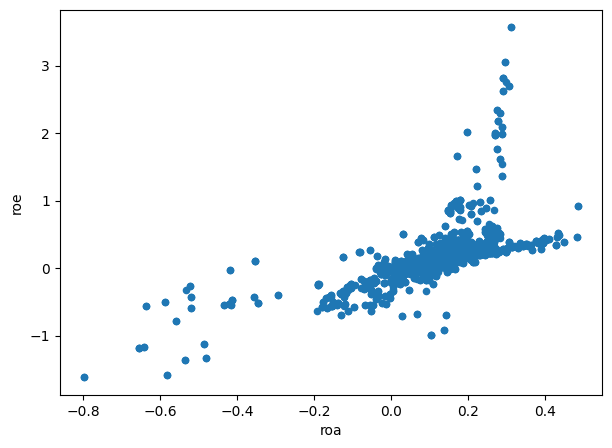

In [79]:
import matplotlib.pylab as plt
roe_roa=final_df_sector.plot.scatter(x='roa',y='roe', figsize=(7,5))
plt.show()

In [80]:
# Keep only numeric columns (drop datetime, strings, etc.)
final_clean_features_df=final_df_sector.select_dtypes(include='number')    # numeric-only features

final_clean_features_df.head()                                                              # quick preview


earnings_yield        bm  sales_to_price       roe       roa  \
permno ticker                                                                 
11790  ALCO          0.104775  1.171036        0.375962  0.114920  0.047840   
       ALCO          0.206192  1.069619        0.424653  0.210342  0.054415   
       ALCO          0.189124  1.069619        0.389502  0.210342  0.054415   
       ALCO          0.118785  1.111812        0.422953  0.113354  0.039191   
       ALCO          0.119223  1.111812        0.424511  0.113354  0.039191   

                  gprof  debt_assets  cash_debt  momentum_12m  vol_60d_ann  \
permno ticker                                                                
11790  ALCO    0.072910     0.498263   0.005189      0.177084     0.295633   
       ALCO    0.079363     0.464254   0.005189      0.246023     0.177280   
       ALCO    0.079363     0.464254   0.005189      0.189985     0.274619   
       ALCO    0.062616     0.524517   0.005189      0.041452     0.224516   
       ALCO    0.062616     0.524517   0.005189     -0.020203     0.230900   

                   addv_63d  
permno ticker                
11790  ALCO    1.478648e+06  
       ALCO    1.210520e+06  
       ALCO    1.643188e+06  
       ALCO    8.906543e+05  
       ALCO    9.220106e+05

In [93]:
final_clean_features_df_AVG=final_clean_features_df.groupby(level=[0,1])[final_clean_features_df.columns.to_list()].mean()

,,earnings_yield,bm,sales_to_price,roe,roa,gprof,debt_assets,cash_debt,momentum_12m,vol_60d_ann,addv_63d
permno,ticker,,,,,,,,,,,
10026,JJSF,0.018554,0.319843,0.451476,0.058690,0.111557,0.353736,0.272843,0.313313,0.057158,0.247788,1.191195e+07
10044,RMCF,-0.111201,0.468323,0.950364,-0.165806,0.031488,0.296272,0.342216,0.034721,0.036285,0.467582,1.229410e+05
10516,ADM,0.082775,0.651854,2.363955,0.135682,0.081771,0.138061,0.581375,0.090994,0.168320,0.261889,2.077835e+08
10661,CYAN,-0.267276,1.638550,3.162574,-0.025696,0.040602,0.388212,0.432856,0.073960,-0.229650,0.663657,1.437872e+05
11308,KO,0.037175,0.104900,0.159442,0.382490,0.143866,0.275917,0.732743,0.165640,0.110753,0.150946,7.988184e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
93096,DG,0.065063,0.222857,1.345735,0.280806,0.125396,0.424791,0.792956,0.089716,-0.313657,0.392462,4.104883e+08
93179,PPC,0.053135,0.527517,2.448963,0.110980,0.147719,0.200010,0.680730,0.100559,0.226364,0.288789,1.880521e+07
93263,CELH,-0.005498,0.030350,0.077421,0.091874,0.096737,0.438898,0.291386,-0.104418,1.412891,0.684186,1.568024e+08


In [96]:
#Scale the numeric features

from sklearn.preprocessing import StandardScaler                                              # import scaler

scaler = StandardScaler()                                                                     # create scaler object
X_scaled = scaler.fit_transform(final_clean_features_df_AVG)                                     # scale numeric features only

final_clean_features_df_norm = pd.DataFrame(                                                       # put scaled data into DataFrame
    X_scaled,
    index=final_clean_features_df_AVG.index,                                                     # keep ticker as index
    columns=final_clean_features_df_AVG.columns                                                  # same feature names
)

final_clean_features_df_norm.index.duplicated().sum()                                              # should be 0 (no duplicate tickers)
final_clean_features_df_norm.head()                                                                # confirm structure looks good


,,earnings_yield,bm,sales_to_price,roe,roa,gprof,debt_assets,cash_debt,momentum_12m,vol_60d_ann,addv_63d
permno,ticker,,,,,,,,,,,
10026,JJSF,0.112160,-0.548316,-0.579963,-0.268526,0.004161,-0.236384,-1.504814,0.439133,-0.068611,-0.651096,-0.476967
10044,RMCF,-0.463288,-0.233521,-0.396656,-0.902897,-0.599630,-0.385262,-1.124034,-0.258995,-0.151452,0.401044,-0.526981
10516,ADM,0.396975,0.155586,0.122743,-0.050967,-0.220452,-0.795151,0.188681,-0.117981,0.372574,-0.583594,0.354008
10661,CYAN,-1.155460,2.247499,0.416181,-0.506981,-0.530905,-0.147063,-0.626523,-0.160667,-1.206903,1.339645,-0.526893
11308,KO,0.194745,-1.004021,-0.687266,0.646452,0.247796,-0.437997,1.019524,0.069078,0.144097,-1.114670,2.861441


In [97]:
final_clean_features_df_norm.duplicated().sum()          # how many rows are exact duplicates?

np.int64(0)

In [98]:
from sklearn.cluster import KMeans                                       # KMeans tool
kmeans = KMeans(n_clusters=4, random_state=0).fit(final_clean_features_df_norm)   # run KMeans

# Create Series of cluster labels indexed by rows                       # row-level cluster labels
memb = pd.Series(kmeans.labels_, index=final_clean_features_df_norm.index, name='cluster')

# Attach cluster to normalized features                                 # keep all ticker-month rows
temp_with_clusters = final_clean_features_df_norm.copy()           # copy df
temp_with_clusters['cluster'] = memb                                    # add cluster column

# Compute majority cluster per ticker                                   # one cluster per ticker (index = ticker)
ticker_cluster = (
    temp_with_clusters
    .groupby(level=0)['cluster']                                        # group by index level 0 (ticker)
    .agg(lambda s: s.value_counts().idxmax())                           # most common cluster id
)

# Print clean cluster membership by ticker                              # each ticker appears once
for cluster_id, rows in ticker_cluster.groupby(ticker_cluster):         # group tickers by majority cluster
    members = sorted(rows.index.tolist())                               # list of tickers in this cluster
    print(f"Cluster {cluster_id}: {', '.join(map(str, members))}")                # print result

Cluster 0: 62958, 77780, 80857, 83112, 84275, 90679
Cluster 1: 10661, 14355, 15382, 22634, 34367, 93012, 93434
Cluster 2: 10026, 10044, 10516, 11654, 11701, 11790, 11884, 11995, 12226, 13508, 13599, 13983, 15408, 16083, 16084, 16555, 16922, 19271, 24263, 25054, 32870, 42059, 56274, 56945, 59185, 76839, 77165, 77730, 78749, 80167, 80928, 80955, 81294, 81728, 82634, 84010, 84172, 85394, 85645, 86728, 87659, 88031, 88924, 89447, 90775, 91977, 93179, 93263, 93397
Cluster 3: 11308, 13856, 16431, 16600, 16678, 17144, 18163, 18729, 25320, 26825, 46578, 49154, 52038, 55976, 81481, 82642, 87055, 89006, 93096


In [99]:
# Number of unique tickers total                             # total ticker count
len(ticker_cluster.index.unique())


81

In [100]:
# Check that index is unique                                # should be True
ticker_cluster.index.is_unique

True

In [101]:
# Build a dict: cluster_id -> set of tickers in that cluster
cluster_members = {
    cid: set(rows.index)
    for cid, rows in ticker_cluster.groupby(ticker_cluster)
}

# Check pairwise overlaps between cluster member sets
for i in cluster_members:
    for j in cluster_members:
        if i < j:
            overlap = cluster_members[i] & cluster_members[j]   # intersection
            print(f"Overlap between cluster {i} and {j}: {len(overlap)} tickers")


Overlap between cluster 0 and 1: 0 tickers
Overlap between cluster 0 and 2: 0 tickers
Overlap between cluster 0 and 3: 0 tickers
Overlap between cluster 1 and 2: 0 tickers
Overlap between cluster 1 and 3: 0 tickers
Overlap between cluster 2 and 3: 0 tickers


In [102]:
ticker_cluster.value_counts()                  # how many tickers per cluster

,count
cluster,
2,49
3,19
1,7
0,6


In [103]:
memb.value_counts()

,count
cluster,
2,49
3,19
1,7
0,6


In [104]:
# Combine cluster labels with normalized features                                  # join labels + data
clustered_df = final_clean_features_df_norm.copy()                                       # copy scaled df
clustered_df['cluster'] = memb                                                     # add cluster id

# Compute mean value of each factor for each cluster                               # average values per group
cluster_member_counts = clustered_df['cluster'].value_counts().sort_index()        # size of each group
cluster_summary_mean = clustered_df.groupby('cluster').mean()                      # mean table and count
summary_combined = cluster_summary_mean.copy()                                      # start with mean table
summary_combined['count'] = cluster_member_counts                                   # add cluster counts
summary_combined                                                                      # show combined summary

,earnings_yield,bm,sales_to_price,roe,roa,gprof,debt_assets,cash_debt,momentum_12m,vol_60d_ann,addv_63d,count
cluster,,,,,,,,,,,,
0,0.227441,1.388644,2.915810,-0.219850,-0.239058,-0.184378,0.185414,-0.083713,0.356265,0.059298,-0.503787,6
1,-2.414496,1.189556,0.085513,-1.580478,-2.186295,-0.570285,-0.451587,-1.785603,-1.616469,2.311478,-0.525069,7
2,0.234149,-0.006525,-0.207829,-0.058947,0.207442,0.112672,-0.399485,0.240615,0.222373,-0.064039,-0.368221,49
3,0.213869,-0.859949,-0.416307,0.803730,0.345988,-0.022245,1.138073,0.063757,-0.090451,-0.705170,1.302159,19


In [105]:
centroids = pd.DataFrame(                                         # create a new DataFrame to hold cluster centers
    kmeans.cluster_centers_,                                      # the numeric coordinates of each cluster center
    columns=final_clean_features_df_norm.columns             # name each column using the original feature names
)

centroids                                                         # display the centroid table


,earnings_yield,bm,sales_to_price,roe,roa,gprof,debt_assets,cash_debt,momentum_12m,vol_60d_ann,addv_63d
0,0.227441,1.388644,2.915810,-0.219850,-0.239058,-0.184378,0.185414,-0.083713,0.356265,0.059298,-0.503787
1,-2.414496,1.189556,0.085513,-1.580478,-2.186295,-0.570285,-0.451587,-1.785603,-1.616469,2.311478,-0.525069
2,0.234149,-0.006525,-0.207829,-0.058947,0.207442,0.112672,-0.399485,0.240615,0.222373,-0.064039,-0.368221
3,0.213869,-0.859949,-0.416307,0.803730,0.345988,-0.022245,1.138073,0.063757,-0.090451,-0.705170,1.302159


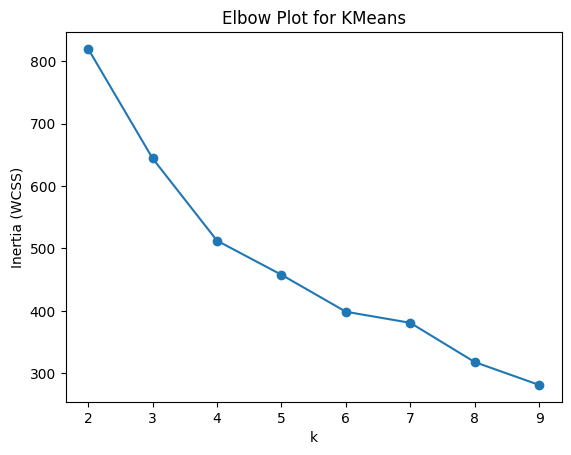

In [111]:
inertias = []                                                      # empty list to store inertia (WCSS) values
K = range(2,10)                                                   # try cluster counts from 2 to 9

for k in K:                                                        # loop through each possible number of clusters
    km = KMeans(n_clusters=k, random_state=0).fit(                 # run KMeans with k clusters
        final_clean_features_df_norm                          # use the normalized feature set
    )
    inertias.append(km.inertia_)                                   # store the inertia (within-cluster sum of squares)

plt.plot(K, inertias, 'o-')                                        # plot K (x-axis) vs inertia (y-axis) with points + line
plt.xlabel("k")                                                    # label x-axis
plt.ylabel("Inertia (WCSS)")                                       # label y-axis (WCSS = within-cluster sum of squares)
plt.title("Elbow Plot for KMeans")                                 # add plot title
plt.show()                                                         # display the plot


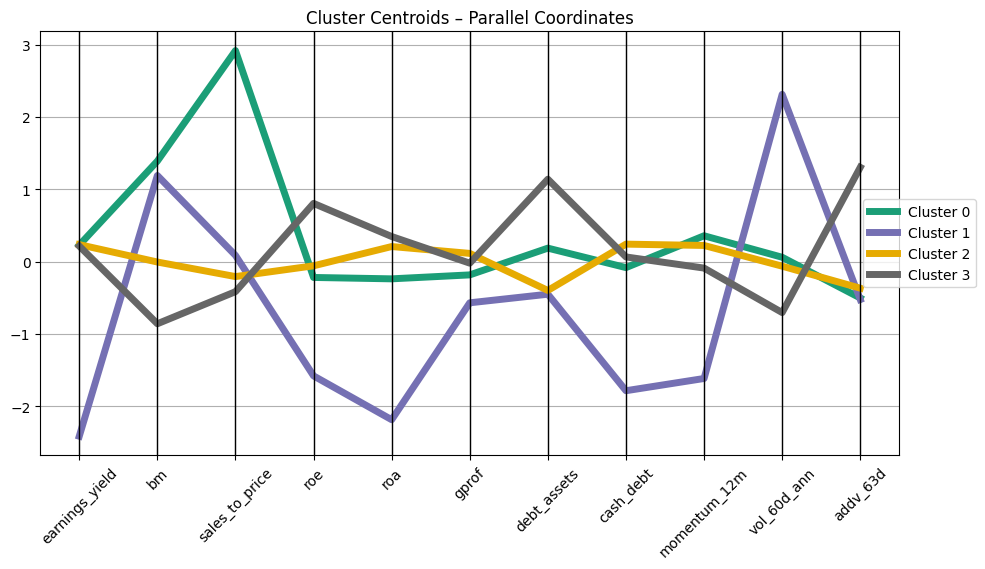

In [112]:
from pandas.plotting import parallel_coordinates          # tool for parallel coordinates
import matplotlib.pyplot as plt                            # plotting

# 1) Build centroid DataFrame from KMeans centers          # convert numpy centroids → DataFrame
centroids_df = pd.DataFrame(
    kmeans.cluster_centers_,                               # cluster centers in feature space
    columns=final_clean_features_df_norm.columns      # same feature names as your data
)

# 2) Add a 'cluster' label column for plotting             # give each row a cluster name
centroids_df['cluster'] = [f'Cluster {i}' for i in range(len(centroids_df))]

# 3) Plot parallel coordinates for centroids               # one line per cluster centroid
plt.figure(figsize=(10, 5.8))                                # set plot size

ax = parallel_coordinates(
    centroids_df,                                          # use centroid DataFrame
    class_column='cluster',                                # color/group by 'cluster' column
    colormap='Dark2',                                      # distinct colors for clusters
    linewidth=5                                            # thicker lines = easier to see
)

plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))  # put legend outside plot
plt.xticks(rotation=45)                                    # rotate feature labels for readability
plt.xlim(-0.5, len(final_clean_features_df_norm.columns) - 0.5)  # align x-limits to features
plt.title("Cluster Centroids – Parallel Coordinates")      # add title
plt.tight_layout()                                         # tidy layout
plt.show()                                                 # display plot


In [117]:
# --- PCA Variance Contribution Summary ---

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Fit PCA on your dataset (X should already be scaled)
X = final_clean_features_df_norm.values
pca = PCA()
pca.fit(X)

# Extract explained variance ratios
var_ratio = pca.explained_variance_ratio_

# Build DataFrame with PC#, variance%, cumulative%
pca_summary = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(var_ratio))],
    'Variance_Ratio': var_ratio,
    'Cumulative_Variance': np.cumsum(var_ratio)
})

pca_summary


,PC,Variance_Ratio,Cumulative_Variance
0,PC1,0.374998,0.374998
1,PC2,0.145781,0.520779
2,PC3,0.115950,0.636729
3,PC4,0.096807,0.733535
4,PC5,0.078593,0.812128
5,PC6,0.062380,0.874508
6,PC7,0.047800,0.922308
7,PC8,0.033425,0.955733
8,PC9,0.020557,0.976290
9,PC10,0.013943,0.990233


In [118]:
# Format as percentages for readability
pca_summary_style = pca_summary.copy()
pca_summary_style['Variance_Ratio'] = (pca_summary_style['Variance_Ratio'] * 100).round(2)
pca_summary_style['Cumulative_Variance'] = (pca_summary_style['Cumulative_Variance'] * 100).round(2)

pca_summary_style


,PC,Variance_Ratio,Cumulative_Variance
0,PC1,37.50,37.50
1,PC2,14.58,52.08
2,PC3,11.59,63.67
3,PC4,9.68,73.35
4,PC5,7.86,81.21
5,PC6,6.24,87.45
6,PC7,4.78,92.23
7,PC8,3.34,95.57
8,PC9,2.06,97.63
9,PC10,1.39,99.02


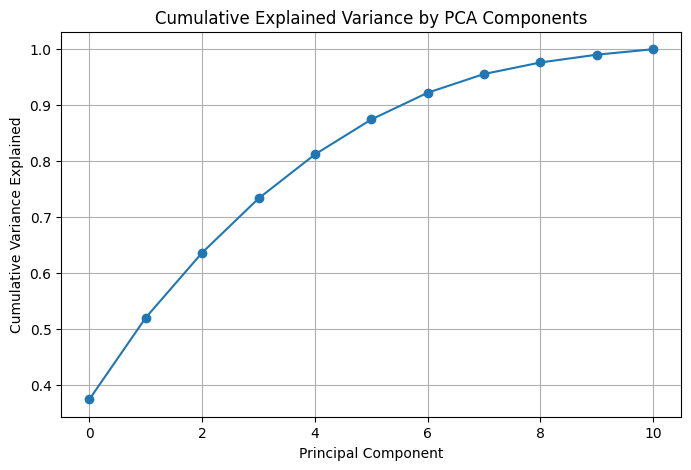

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(var_ratio), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()


In [120]:
pca.explained_variance_ratio_      # shows % of variance captured by each PCA axis


array([0.37499828, 0.14578071, 0.11594962, 0.09680672, 0.07859285,
       0.06238013, 0.04779981, 0.03342503, 0.02055658, 0.01394298,
       0.00976729])

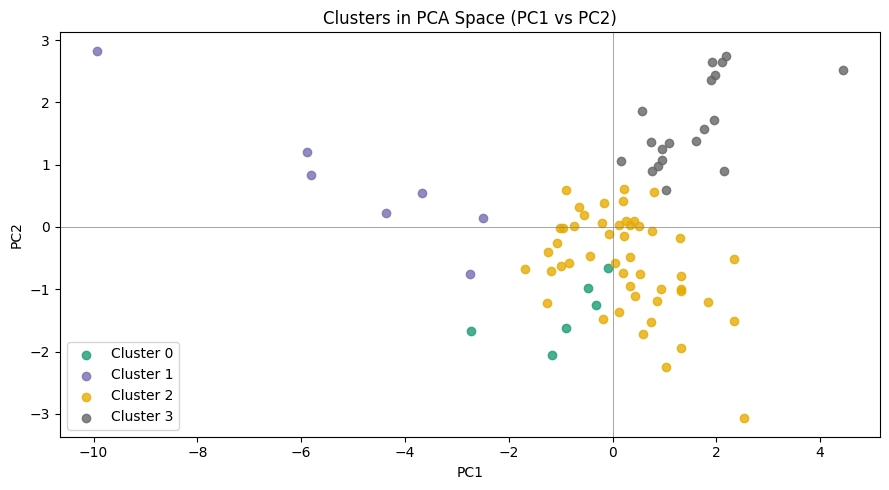

In [125]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# 1) Fit PCA on your scaled feature matrix X -----------------------------
pca = PCA(n_components=5)                      # keep first _ principal components
X_pca = pca.fit_transform(X)                   # shape: (n_samples, 2)

# 2) Build PCA scores DataFrame -----------------------------------------
pca_df = pd.DataFrame(
    X_pca,                                     # PC1, PC2 scores
    columns=['PC1','PC2','PC3','PC4','PC5']                     # name the columns
)

# 3) Attach cluster labels from KMeans ----------------------------------
pca_df['cluster'] = kmeans.labels_            # cluster id for each row
n_clusters = kmeans.n_clusters                # number of clusters

# 4) Plot PC1–PC2 scatter colored by cluster ----------------------------

plt.figure(figsize=(9, 5))                    # set plot size

# Define Dark2 colormap and generate n distinct colors
cmap = plt.cm.get_cmap('Dark2', n_clusters)

for cid in range(n_clusters):                 # loop over cluster IDs
    subset = pca_df[pca_df['cluster'] == cid] # rows belonging to this cluster
    plt.scatter(
        subset['PC1'],                        # x-axis = PC1 scores
        subset['PC2'],                        # y-axis = PC2 scores
        color=cmap(cid),                      # unique color from Dark2
        label=f'Cluster {cid}',               # legend label
        alpha=0.8                             # transparency for clarity
    )

plt.axhline(0, color='gray', linewidth=0.5)   # horizontal reference line at 0
plt.axvline(0, color='gray', linewidth=0.5)   # vertical reference line at 0
plt.xlabel('PC1')                             # x-axis label
plt.ylabel('PC2')                             # y-axis label
plt.title('Clusters in PCA Space (PC1 vs PC2)')
plt.legend()
plt.tight_layout()
plt.show()


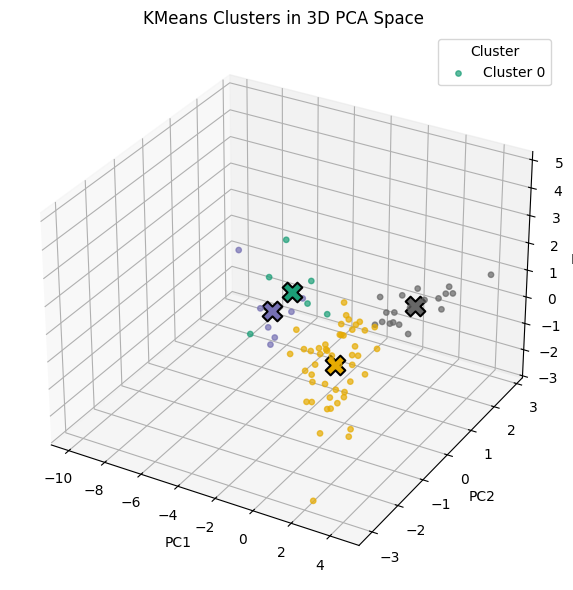

In [126]:
from mpl_toolkits.mplot3d import Axes3D                 # 3D plotting support
import matplotlib.pyplot as plt                         # plotting
from matplotlib import cm                               # colormap tools
import pandas as pd                                     # data frames

# 1) Make sure we start from the DataFrame ------------- # not from a raw numpy array
X_df = final_clean_features_df_norm                # scaled feature DataFrame
X = X_df.values                                         # numpy matrix for PCA / KMeans

# 2) Run PCA to get first 3 components -----------------
pca_3d = PCA(n_components=3)                            # keep first 3 PCs
X_pca_3d = pca_3d.fit_transform(X)                      # PC1, PC2, PC3 scores

# 3) Build PCA DataFrame with proper index -------------
pca3_df = pd.DataFrame(                                 # make table for plotting
    X_pca_3d,                                           # 3D PCA scores
    columns=['PC1', 'PC2', 'PC3'],                      # name the three PCs
    index=X_df.index                                    # use ticker/month index from DataFrame
)
pca3_df['cluster'] = memb.values                        # attach cluster labels

# 4) Set up consistent Dark2 colors --------------------
n_clusters = kmeans.n_clusters                          # number of clusters
dark2 = cm.get_cmap('Dark2', n_clusters)                # same colormap as other plots
cluster_colors = {i: dark2(i) for i in range(n_clusters)}  # map cluster id → color

# 5) Create 3D scatter figure --------------------------
fig = plt.figure(figsize=(9, 6))                        # overall figure size
ax = fig.add_subplot(111, projection='3d')              # 3D axes object

# 6) Plot each cluster in 3D PCA space -----------------
for cid in range(n_clusters):                           # loop over cluster IDs
    subset = pca3_df[pca3_df['cluster'] == cid]         # rows in this cluster
    ax.scatter(
        subset['PC1'],                                  # x-axis = PC1
        subset['PC2'],                                  # y-axis = PC2
        subset['PC3'],                                  # z-axis = PC3
        s=15,                                           # point size
        alpha=0.7,                                      # transparency
        color=cluster_colors[cid],                      # Dark2 color for this cluster
        label=f'Cluster {cid}' if cid == 0 else None    # label once to avoid duplicates
    )

# 7) Project KMeans centroids into 3D PCA space --------
centroids = kmeans.cluster_centers_                     # centers in feature space
centroids_pca3 = pca_3d.transform(centroids)            # centers in PC1–PC3 space

# 8) Plot centroids as large X markers -----------------
for cid in range(n_clusters):                           # one centroid per cluster
    ax.scatter(
        centroids_pca3[cid, 0],                         # centroid PC1
        centroids_pca3[cid, 1],                         # centroid PC2
        centroids_pca3[cid, 2],                         # centroid PC3
        marker='X',                                     # X marker
        s=200,                                          # large size
        color=cluster_colors[cid],                      # same color as cluster points
        edgecolors='black',                             # black outline
        linewidths=1.5                                  # outline thickness
    )

# 9) Axis labels, title, legend ------------------------
ax.set_xlabel('PC1')                                    # label x-axis
ax.set_ylabel('PC2')                                    # label y-axis
ax.set_zlabel('PC3')                                    # label z-axis
ax.set_title('KMeans Clusters in 3D PCA Space')         # chart title
ax.legend(loc='best', title='Cluster')                  # cluster legend

plt.tight_layout()                                      # tidy spacing
plt.show()                                              # display 3D plot
